In [0]:
#import packages
import pandas as pd
from pandas import datetime
import numpy as np


#to plot within notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data

import seaborn as sns


#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,10

In [0]:


TCS = pd.read_csv('tcs_stock.csv', parse_dates=['Date'])

INFY = pd.read_csv('infy_stock.csv', parse_dates=['Date'])

NIFTY = pd.read_csv('nifty_it_index.csv', parse_dates=['Date'])


stocks = [TCS, INFY, NIFTY]


TCS.name = 'TCS'
INFY.name = 'INFY'
NIFTY.name = 'NIFTY_IT'


In [0]:
TCS["Date"] = pd.to_datetime(TCS["Date"])
INFY["Date"] = pd.to_datetime(INFY["Date"])
NIFTY["Date"] = pd.to_datetime(NIFTY["Date"])

In [153]:
TCS.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724
5,2015-01-08,TCS,EQ,2417.70,2442.4,2449.00,2420.55,2446.00,2443.80,2434.81,782704,1.905739e+14,47699,450768,0.5759
6,2015-01-09,TCS,EQ,2443.80,2455.0,2519.90,2450.00,2510.00,2512.30,2490.01,1598821,3.981082e+14,81743,865777,0.5415
7,2015-01-12,TCS,EQ,2512.30,2517.0,2528.00,2480.25,2527.95,2509.70,2497.82,798003,1.993266e+14,58810,451228,0.5654
8,2015-01-13,TCS,EQ,2509.70,2520.0,2530.40,2480.10,2498.00,2497.90,2509.40,734216,1.842440e+14,49993,386133,0.5259
9,2015-01-14,TCS,EQ,2497.90,2516.0,2531.80,2500.50,2525.05,2521.95,2517.54,893548,2.249546e+14,69237,498193,0.5575


In [154]:
TCS.shape

(248, 15)

In [155]:
INFY.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.50,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.10,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.00,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270
5,2015-01-08,INFY,EQ,1963.55,1985.60,1997.00,1950.00,1979.25,1973.45,1972.78,3391230,6.690160e+14,92752,2686012,0.7920
6,2015-01-09,INFY,EQ,1973.45,1980.10,2109.00,1913.05,2075.30,2074.45,2037.69,11215832,2.285439e+15,359214,3369489,0.3004
7,2015-01-12,INFY,EQ,2074.45,2092.00,2119.20,2075.00,2112.95,2115.95,2099.40,3189722,6.696516e+14,107209,1818800,0.5702
8,2015-01-13,INFY,EQ,2115.95,2107.80,2107.80,2075.00,2092.00,2088.90,2089.42,2200309,4.597374e+14,66676,1385009,0.6295
9,2015-01-14,INFY,EQ,2088.90,2098.50,2133.00,2092.60,2129.00,2128.65,2110.88,2480315,5.235638e+14,53263,1832958,0.7390


In [156]:
NIFTY.head(10)

,Date,Open,High,Low,Close,Volume,Turnover
0,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09
1,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09
2,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10
3,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10
4,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10
5,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10
6,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10
7,2015-01-12,11456.00,11565.85,11378.80,11543.65,16505074,1.712310e+10
8,2015-01-13,11545.25,11546.60,11437.95,11502.80,12511358,1.417510e+10
9,2015-01-14,11561.95,11631.55,11521.00,11614.30,12544558,1.438530e+10


In [0]:
# data extraction


def features_build(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.weekofyear
    
    
    
for i in range(len(stocks)):
    # print(stocks[i])
    features_build(stocks[i])
    

In [158]:
# check for newly added features. 
TCS.shape

(248, 19)

In [159]:
TCS.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Year,Month,Day,WeekOfYear
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,2015,1,1,1
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,2015,1,2,1
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,2015,1,5,2
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,2015,1,6,2
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,2015,1,7,2


**select Close (Closing Price to be the target variable). **

# PART-1

Let us calculate moving averages (closing price) for weeks = [4,16,28,40,52].

In [0]:
weeks = [4, 16, 28, 40, 52]

In [0]:
def indexing(stock):
    stock.index = stock['Date']
    return stock

In [162]:
indexing(TCS)
indexing(INFY)
indexing(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015,1,6,2
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015,1,7,2
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,2015,1,8,2
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,2015,1,9,2
2015-01-12,2015-01-12,11456.00,11565.85,11378.80,11543.65,16505074,1.712310e+10,2015,1,12,3
2015-01-13,2015-01-13,11545.25,11546.60,11437.95,11502.80,12511358,1.417510e+10,2015,1,13,3


In [0]:
def plot_time_series(stock, weeks = [4, 16, 28, 40, 52]):
    
    dummy = pd.DataFrame()
    # First Resampling into Weeks format to calculate for weeks
    dummy['Close'] = stock['Close'].resample('W').mean() 
     
    for i in range(len(weeks)):
        m_a = dummy['Close'].rolling(weeks[i]).mean() # M.A using inbuilt function
        dummy[" Mov.AVG for " + str(weeks[i])+ " Weeks"] = m_a
        print('Calculated Moving Averages: for {0} weeks: \n\n {1}' .format(weeks[i], dummy['Close']))
    dummy.plot(title="Moving Averages for {} \n\n" .format(stock.name))
    
        

Table With Calculated Moving Average + plot for Moving averages for weeks = [4,16,28,40,52]

Calculated Moving Averages: for 4 weeks: 

 Date
2015-01-04    2562.500000
2015-01-11    2472.130000
2015-01-18    2520.160000
2015-01-25    2508.480000
2015-02-01    2517.087500
2015-02-08    2542.980000
2015-02-15    2482.970000
2015-02-22    2644.262500
2015-03-01    2677.941667
2015-03-08    2721.962500
2015-03-15    2619.490000
2015-03-22    2582.510000
2015-03-29    2562.020000
2015-04-05    2553.583333
2015-04-12    2618.400000
2015-04-19    2585.225000
2015-04-26    2450.250000
2015-05-03    2486.550000
2015-05-10    2506.990000
2015-05-17    2520.940000
2015-05-24    2552.710000
2015-05-31    2608.980000
2015-06-07    2602.010000
2015-06-14    2563.390000
2015-06-21    2522.040000
2015-06-28    2575.840000
2015-07-05    2583.720000
2015-07-12    2568.300000
2015-07-19    2531.880000
2015-07-26    2532.470000
2015-08-02    2499.450000
2015-08-09    2538.200000
2015-08-16    2637.360000
2015-08-23    2704.450000
2015-08-30    2573.610000
2015-09-06    2569.260000
2015-09-13    2

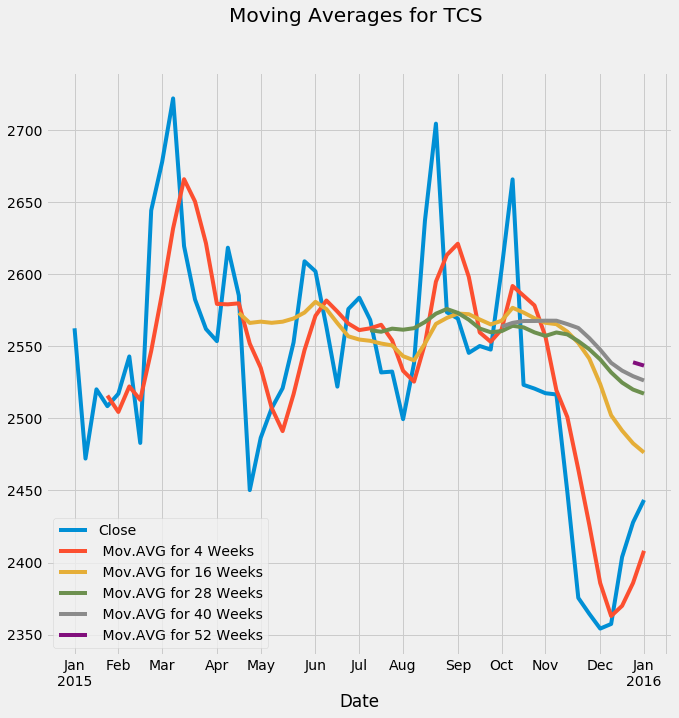

In [164]:
plot_time_series(TCS)

Calculated Moving Averages: for 4 weeks: 

 Date
2015-01-04    1993.800000
2015-01-11    1992.310000
2015-01-18    2117.210000
2015-01-25    2161.620000
2015-02-01    2142.112500
2015-02-08    2164.980000
2015-02-15    2283.870000
2015-02-22    2295.762500
2015-03-01    2279.383333
2015-03-08    2277.950000
2015-03-15    2201.790000
2015-03-22    2244.910000
2015-03-29    2202.500000
2015-04-05    2206.766667
2015-04-12    2197.440000
2015-04-19    2206.600000
2015-04-26    2105.930000
2015-05-03    1962.237500
2015-05-10    1955.970000
2015-05-17    1958.800000
2015-05-24    2031.520000
2015-05-31    2006.470000
2015-06-07    2023.410000
2015-06-14    1998.270000
2015-06-21     996.560000
2015-06-28    1003.010000
2015-07-05     990.040000
2015-07-12     959.360000
2015-07-19     979.260000
2015-07-26    1080.530000
2015-08-02    1072.120000
2015-08-09    1081.020000
2015-08-16    1129.360000
2015-08-23    1153.300000
2015-08-30    1087.230000
2015-09-06    1091.230000
2015-09-13    1

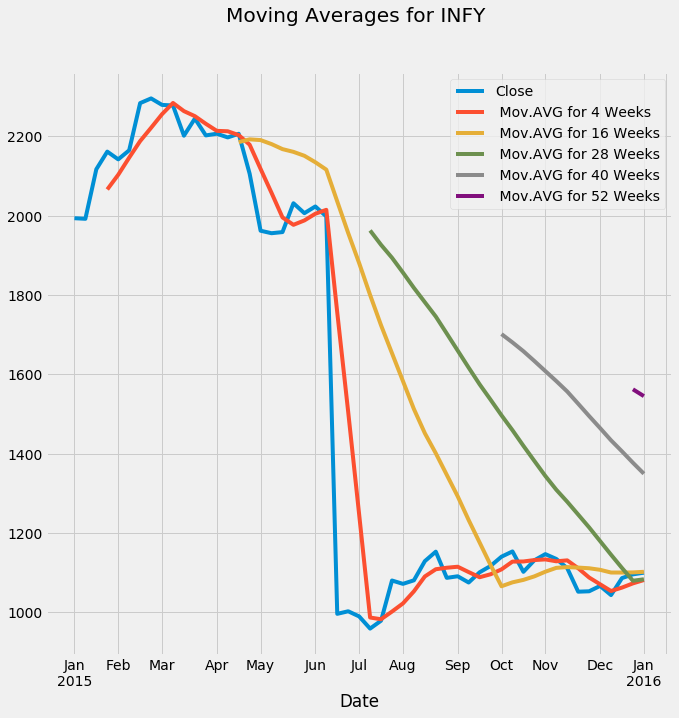

In [165]:
plot_time_series(INFY)

Calculated Moving Averages: for 4 weeks: 

 Date
2015-01-04    11293.9000
2015-01-11    11108.4500
2015-01-18    11598.0400
2015-01-25    11777.4900
2015-02-01    11787.9750
2015-02-08    12055.9700
2015-02-15    12298.5000
2015-02-22    12603.9250
2015-03-01    12567.3500
2015-03-08    12728.9250
2015-03-15    12383.0900
2015-03-22    12343.4000
2015-03-29    12104.1300
2015-04-05    12045.3500
2015-04-12    12149.4100
2015-04-19    12087.6000
2015-04-26    11439.2800
2015-05-03    11061.5750
2015-05-10    11120.0700
2015-05-17    11175.8000
2015-05-24    11514.0700
2015-05-31    11519.7300
2015-06-07    11381.0800
2015-06-14    11211.9500
2015-06-21    11163.1100
2015-06-28    11339.5300
2015-07-05    11154.1100
2015-07-12    11000.4400
2015-07-19    11130.7500
2015-07-26    11517.8000
2015-08-02    11425.6200
2015-08-09    11542.7000
2015-08-16    11859.2800
2015-08-23    12085.5600
2015-08-30    11420.2300
2015-09-06    11554.6600
2015-09-13    11408.5000
2015-09-20    11597.5000
2

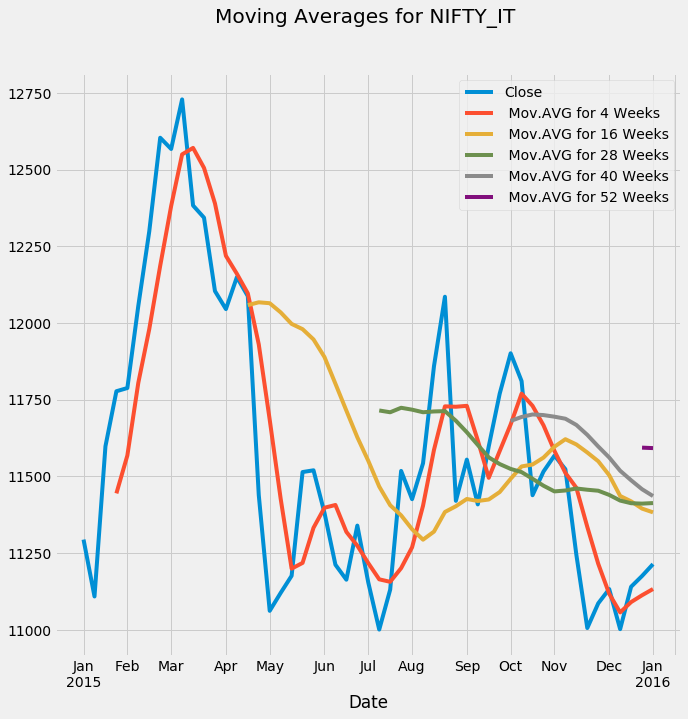

In [166]:
plot_time_series(NIFTY)

**Now , we further have to put rolling window as 10 and then 75. Keeping in mind the stock market holidays. For that, we first
need to resample again as per days.
We are not worried about special/ national holidays. because for that we need to use special calendar APIs, which may provide us holidays for each year. Here, we are only considering *STOCK MARKET HOLIDAYS*. ie. Saturday and Sunday
**

**Thus, instead of resample(), we will here use resample.Resampler.asfreq() function. Because it also provide us option of padding (backwardfill/forwardfill missing values "not NANs" ). 
source: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.asfreq.html
We are using this, because on saturdays and sundays, market remains closed, so friday's close price could be forwarded in closing days.**

In [0]:
TCS = TCS.asfreq('D', method ='pad')        # pad-ffill : forward-fill
INFY = INFY.asfreq('D', method ='pad')
NIFTY = NIFTY.asfreq('D', method ='pad')


TCS.name = 'TCS'
INFY.name = 'INFY'
NIFTY.name = 'NIFTY_IT'

In [0]:
def plot_roll_win(stock, win = [10, 75]):
    
    dummy = pd.DataFrame()
    
    dummy['Close'] = stock['Close']
     
    for i in range(len(win)):
        m_a = dummy['Close'].rolling(win[i]).mean() # M.A using predefined function
        dummy[" Mov.AVG for " + str(win[i])+ " Roll Window"] = m_a
        print('Calculated Moving Averages: for {0} weeks: \n\n {1}' .format(win[i], dummy['Close']))
    dummy.plot(title="Moving Averages for {} \n\n" .format(stock.name))
    

Calculated Moving Averages: for 10 weeks: 

 Date
2015-01-01    2545.55
2015-01-02    2579.45
2015-01-03    2579.45
2015-01-04    2579.45
2015-01-05    2540.25
2015-01-06    2446.60
2015-01-07    2417.70
2015-01-08    2443.80
2015-01-09    2512.30
2015-01-10    2512.30
2015-01-11    2512.30
2015-01-12    2509.70
2015-01-13    2497.90
2015-01-14    2521.95
2015-01-15    2539.10
2015-01-16    2532.15
2015-01-17    2532.15
2015-01-18    2532.15
2015-01-19    2511.00
2015-01-20    2500.45
2015-01-21    2513.80
2015-01-22    2513.55
2015-01-23    2503.60
2015-01-24    2503.60
2015-01-25    2503.60
2015-01-26    2503.60
2015-01-27    2502.05
2015-01-28    2539.60
2015-01-29    2544.65
2015-01-30    2482.05
               ...   
2015-12-02    2365.20
2015-12-03    2350.75
2015-12-04    2328.40
2015-12-05    2328.40
2015-12-06    2328.40
2015-12-07    2319.80
2015-12-08    2329.00
2015-12-09    2367.65
2015-12-10    2384.55
2015-12-11    2386.00
2015-12-12    2386.00
2015-12-13    2386.00
2015

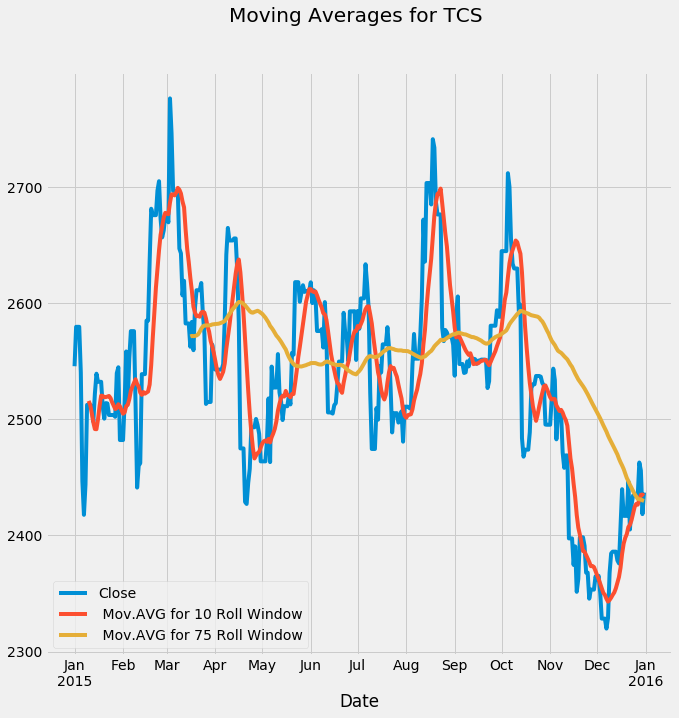

In [169]:
plot_roll_win(TCS)

Calculated Moving Averages: for 10 weeks: 

 Date
2015-01-01    1974.40
2015-01-02    2013.20
2015-01-03    2013.20
2015-01-04    2013.20
2015-01-05    1995.90
2015-01-06    1954.20
2015-01-07    1963.55
2015-01-08    1973.45
2015-01-09    2074.45
2015-01-10    2074.45
2015-01-11    2074.45
2015-01-12    2115.95
2015-01-13    2088.90
2015-01-14    2128.65
2015-01-15    2134.25
2015-01-16    2118.30
2015-01-17    2118.30
2015-01-18    2118.30
2015-01-19    2102.50
2015-01-20    2124.20
2015-01-21    2169.90
2015-01-22    2196.45
2015-01-23    2215.05
2015-01-24    2215.05
2015-01-25    2215.05
2015-01-26    2215.05
2015-01-27    2136.50
2015-01-28    2144.55
2015-01-29    2145.50
2015-01-30    2141.90
               ...   
2015-12-02    1060.70
2015-12-03    1057.75
2015-12-04    1049.05
2015-12-05    1049.05
2015-12-06    1049.05
2015-12-07    1046.25
2015-12-08    1044.40
2015-12-09    1028.20
2015-12-10    1047.35
2015-12-11    1052.80
2015-12-12    1052.80
2015-12-13    1052.80
2015

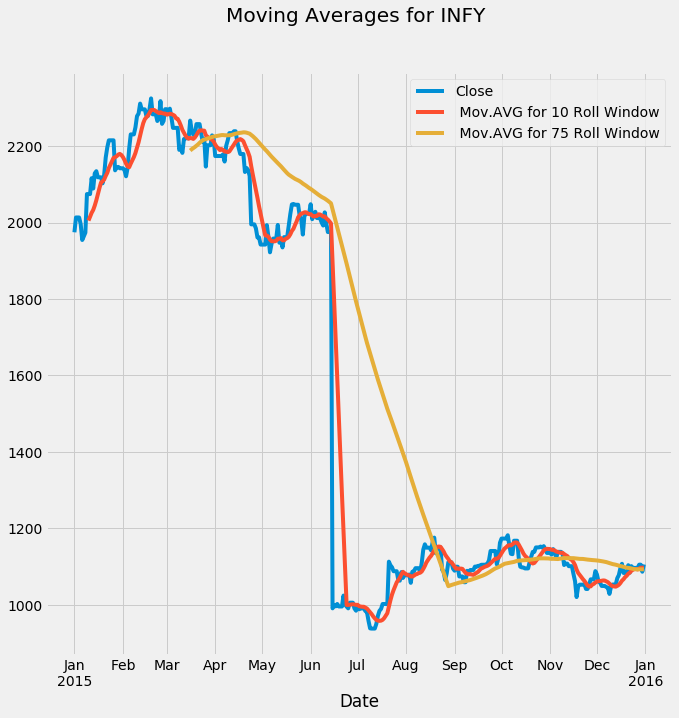

In [170]:
plot_roll_win(INFY)

Calculated Moving Averages: for 10 weeks: 

 Date
2015-01-01    11215.70
2015-01-02    11372.10
2015-01-03    11372.10
2015-01-04    11372.10
2015-01-05    11248.55
2015-01-06    10959.90
2015-01-07    10916.00
2015-01-08    11018.15
2015-01-09    11399.65
2015-01-10    11399.65
2015-01-11    11399.65
2015-01-12    11543.65
2015-01-13    11502.80
2015-01-14    11614.30
2015-01-15    11669.85
2015-01-16    11659.60
2015-01-17    11659.60
2015-01-18    11659.60
2015-01-19    11642.75
2015-01-20    11695.00
2015-01-21    11813.70
2015-01-22    11850.85
2015-01-23    11885.15
2015-01-24    11885.15
2015-01-25    11885.15
2015-01-26    11885.15
2015-01-27    11693.45
2015-01-28    11809.55
2015-01-29    11824.15
2015-01-30    11824.75
                ...   
2015-12-02    11149.60
2015-12-03    11081.90
2015-12-04    10969.05
2015-12-05    10969.05
2015-12-06    10969.05
2015-12-07    10998.65
2015-12-08    10981.85
2015-12-09    10930.05
2015-12-10    11055.50
2015-12-11    11043.05
2015-12

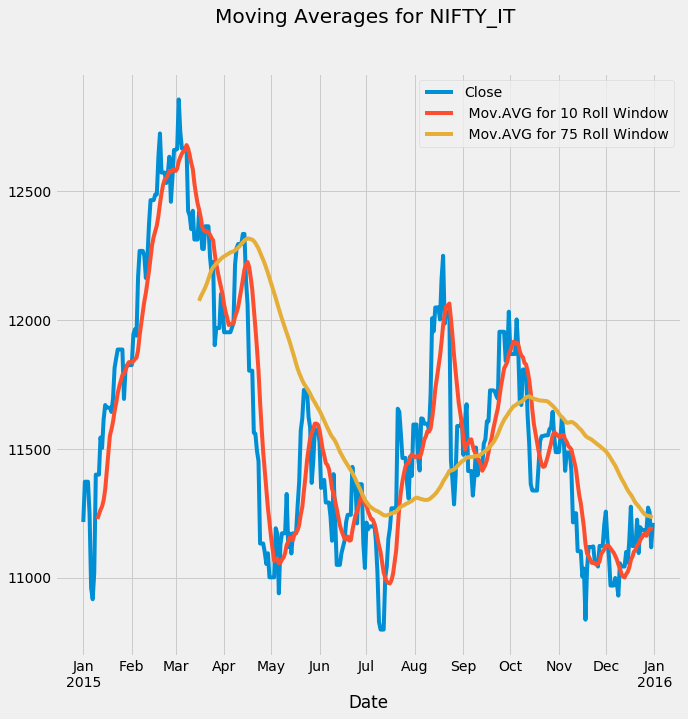

In [171]:
plot_roll_win(NIFTY)

**Conclusion:** From Above graph plottings, we can visualize that, as much as the rolling window is small, the moving average is somehow significant and closer to the actual data

### Volume Shocks

In [0]:
def volume_shocks(stock):
    """
    'Volume' - Vol_t
    'Volume next day - vol_t+1
    
    """
    stock["vol_t+1"] = stock.Volume.shift(1)  #next rows value
    
    stock["volume_shock"] = ((abs(stock["vol_t+1"] - stock["Volume"])/stock["Volume"]*100)  > 10).astype(int)
    
    return stock

In [173]:
volume_shocks(TCS)
volume_shocks(INFY)
volume_shocks(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock
Date,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1,NaN,0
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,4246150.0,1
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0
2015-01-04,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2,10004862.0,1
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015,1,6,2,8858018.0,1
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015,1,7,2,12515739.0,1
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,2015,1,8,2,10976356.0,1
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,2015,1,9,2,12975117.0,1


### VOLume Shock Direction

In [0]:
def direction_fun(stock):
    
    # considerng only shock - 1 valued rows.
    # 0 - negative and 1- positive
    if stock["volume_shock"] == 0:
        pass
    else:
        if (stock["vol_t+1"] - stock["Volume"]) < 0:
            return 0
        else:
            return 1
    
    

In [0]:
def vol_shock_direction(stock):
    stock['VOL_SHOCK_DIR'] = 'Nan'
    stock['VOL_SHOCK_DIR'] = stock.apply(direction_fun, axis=1)
    return stock

In [176]:
vol_shock_direction(TCS)
vol_shock_direction(INFY)
vol_shock_direction(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR
Date,,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1,NaN,0,NaN
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,4246150.0,1,0.0
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN
2015-01-04,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2,10004862.0,1,1.0
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015,1,6,2,8858018.0,1,0.0
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015,1,7,2,12515739.0,1,1.0
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,2015,1,8,2,10976356.0,1,0.0
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,2015,1,9,2,12975117.0,1,0.0


### Price shocks

In [0]:
def price_shocks(stock):
    """
    'ClosePrice' - Close_t
    'Close Price next day - vol_t+1
    
    """
    stock["price_t+1"] = stock.Close.shift(1)  #next rows value
    
    stock["price_shock"] = (abs((stock["price_t+1"] - stock["Close"])/stock["Close"]*100)  > 2).astype(int)
    
    stock["price_black_swan"] = stock['price_shock'] # Since both had same data and info/
    
    return stock

In [178]:
price_shocks(TCS)
price_shocks(INFY)
price_shocks(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan
Date,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1,NaN,0,NaN,NaN,0,0
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,4246150.0,1,0.0,11215.70,0,0
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN,11372.10,0,0
2015-01-04,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN,11372.10,0,0
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2,10004862.0,1,1.0,11372.10,0,0
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015,1,6,2,8858018.0,1,0.0,11248.55,1,1
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015,1,7,2,12515739.0,1,1.0,10959.90,0,0
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,2015,1,8,2,10976356.0,1,0.0,10916.00,0,0
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,2015,1,9,2,12975117.0,1,0.0,11018.15,1,1


### Price Shock Direction and Black Swan shock direction (both same) 

In [0]:
def direction_fun_price(stock):
    
    # considerng only shock - 1 valued rows.
    # 0 - negative and 1- positive
    if stock["price_shock"] == 0:
        pass
    else:
        if (stock["price_t+1"] - stock["Close"]) < 0:
            return 0
        else:
            return 1

In [0]:
def price_shock_direction(stock):
    stock['PRICE_SHOCK_DIR'] = 'Nan'
    stock['PRICE_SHOCK_DIR'] = stock.apply(direction_fun_price, axis=1)
    return stock

In [181]:
vol_shock_direction(TCS)
vol_shock_direction(INFY)
vol_shock_direction(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan
Date,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1,NaN,0,NaN,NaN,0,0
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,4246150.0,1,0.0,11215.70,0,0
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN,11372.10,0,0
2015-01-04,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN,11372.10,0,0
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2,10004862.0,1,1.0,11372.10,0,0
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015,1,6,2,8858018.0,1,0.0,11248.55,1,1
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015,1,7,2,12515739.0,1,1.0,10959.90,0,0
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,2015,1,8,2,10976356.0,1,0.0,10916.00,0,0
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,2015,1,9,2,12975117.0,1,0.0,11018.15,1,1


### Price Shock w/o volume shocks

In [0]:
def price_shock_wo_vol_shock(stock):
    
    stock["not_vol_shock"]  = (~(stock["volume_shock"].astype(bool))).astype(int)
    stock["price_shock_w/0_vol_shock"] = stock["not_vol_shock"] & stock["price_shock"]
    
    return stock

In [183]:
price_shock_wo_vol_shock(TCS)
price_shock_wo_vol_shock(INFY)
price_shock_wo_vol_shock(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan,not_vol_shock,price_shock_w/0_vol_shock
Date,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1,NaN,0,NaN,NaN,0,0,1,0
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,4246150.0,1,0.0,11215.70,0,0,0,0
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN,11372.10,0,0,1,0
2015-01-04,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN,11372.10,0,0,1,0
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2,10004862.0,1,1.0,11372.10,0,0,0,0
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015,1,6,2,8858018.0,1,0.0,11248.55,1,1,0,0
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015,1,7,2,12515739.0,1,1.0,10959.90,0,0,0,0
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,2015,1,8,2,10976356.0,1,0.0,10916.00,0,0,0,0
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,2015,1,9,2,12975117.0,1,0.0,11018.15,1,1,0,0


# Part-2 Visualisation with BOKEH

In [0]:
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import show, output_notebook
from bokeh.palettes import Blues9
from bokeh.palettes import RdBu3
from bokeh.models import ColumnDataSource, CategoricalColorMapper, ContinuousColorMapper
from bokeh.palettes import Spectral11

In [185]:
output_notebook()

Loading BokehJS ...

In [0]:
def bokeh_plot(stock):
    data = dict(stock=stock['Close'], Date=stock.index)
    
    p = figure(plot_width=800, plot_height=250,  title = 'time series for {}' .format(stock.name), x_axis_type="datetime")
    p.line(stock.index, stock['Close'], color='blue', alpha=0.5)
    
    #show price shock w/o vol shock
    
    p.circle(stock.index, stock.Close*stock["price_shock_w/0_vol_shock"], size=4, legend='price shock without vol shock')
    show(p)

In [187]:

output_notebook()
bokeh_plot(TCS)
bokeh_plot(INFY)
bokeh_plot(NIFTY)


Loading BokehJS ...

In [0]:
from statsmodels.tsa.stattools import acf, pacf

def draw_pacf(stock):
    
    lags = 50

    x = list(range(lags))

    p = figure(plot_height=500, title="Partial Autocorrelation PLot {}" .format(stock.name))

    partial_autocorr = pacf(stock["Close"], nlags=lags)
    p.vbar(x=x, top=partial_autocorr, width=0.9)
    show(p)

In [189]:
output_notebook()

draw_pacf(TCS)
draw_pacf(INFY)
draw_pacf(NIFTY)

Loading BokehJS ...